# 推論

If you come here without expecting Japanese, please click [Google translated version](https://translate.google.com/translate?hl=&sl=ja&tl=en&u=https%3A%2F%2Fpy4etrics.github.io%2F11_Inference.html) in English or the language of your choice.

---

In [1]:
from scipy.stats import t, f
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import wooldridge

## 説明：仮説検定

仮説検定は以下の手順でおこなう。
1. 母集団のパラメータについて帰無仮説（Null Hypothesis）と対立仮説（Alternative Hypothesis）を設定する。
    * 帰無仮説は棄却するかどうかの判断の対象となる仮説（例えば，$\hat{\beta}_1=0$）
    * 対立仮説は帰無仮説に相反する仮説（例えば，$\hat{\beta}_1\neq 0$）
1. 適切な検定統計量を決め，判定するための有意水準を予め決める。
    * 有意水準 ＝ 下で説明する**第一種過誤の確率**
1. 計算した検定統計量の値と有意水準に対応する値を比較することにより，帰無仮説を棄却するかしないかを判断する。２つの可能性しかない。
    * 帰無仮説を棄却する（対立仮説を採択する）。
    * 帰無仮説を棄却できない（対立仮説を採択できない）。

---
検定をおこなう際には間違いが発生する。それをまとめたのが次の表である。

|                        | 帰無仮説は真 | 帰無仮説は偽 |   |
|------------------------|--------------|--------------|---|
| 帰無仮説を棄却できない | 正しい結論   | 第２種過誤   |   |
| 帰無仮説を棄却         | 第１種過誤   | 正しい結論   |   |

検定を警察の行動に例えて次のように考えることもできる。
* 帰無仮説 $\Rightarrow$ 「無罪」
* 帰無仮説の棄却 $\Rightarrow$ 「逮捕」
* 帰無仮説を棄却しない $\Rightarrow$ 「逮捕しない」
* 第１種過誤 $\Rightarrow$「冤罪で逮捕」
* 第２種過誤 $\Rightarrow$「真犯人を取り逃がす」

|                        | 無実は真 | 無実は偽 |
|------------------------|:------------:|:------------:|
| 逮捕しない | 正しい結論  | 取り逃す   |
| 逮捕         | 冤罪  | 正しい結論   |

* 統計的優位性とは，帰無仮説が正しい場合，帰無仮説の内容が発生した確率が非常に低い場合を指す。即ち，発生イベントが非常に起こりにくく，偶然のの可能性が非常に高い場合である。
* 第一種過誤は，帰無仮説が正しい場合に棄却すると発生する。慣例でその確率を$\alpha$で表す。$\alpha=0.05$がよく使われるが，これを使う場合，間違って正しい帰無仮説を棄却する確率は最大5%まで許容するという意味になる。

## $t$検定

### 説明：$t$値と$p$値

新たな仮定を導入する。

* 仮定６：誤差項は説明変数は独立であり正規分布に従う（誤差項の正規性）

$$u\sim N\left(0,\sigma^2\right)$$

仮定１〜６を**Classical Linear Model (CLM) Assumptions**（CLM仮定）と呼ぶ。

---
CLM仮定の下では：
* OLS推定量は正規分布に従う。

    $$
    \hat{\beta}_j\sim N\left(\beta_j,\text{Var}\left(\hat{\beta}_j\right)\right)
    $$
    
* OLS推定量の標準誤差を使い標準化すると以下が成立する。

    $$
    \frac{\hat{\beta}_j-\beta_j}{\text{se}\left(\hat{\beta}_j\right)}\sim t_{n-k-1}
    $$
    
    ここで$t_{n-k-1}$は自由度$n-k-1$の$t$分布を表している。$n$は標本の大きさ，$k$は定数項以外の説明変数の数である（定数項がある場合）。

---
この関係を使うことによりOLS推定量の検定が可能となる。

* 帰無仮説：$H_0:\hat{\beta}_j=0$
    * $H_0$が正しい場合，$t$統計量は次の分布に従う。
    
        $$
        t_{\hat{\beta}_j}\equiv\frac{\hat{\beta}_j}{\text{se}\left(\hat{\beta}_j\right)}\sim t_{n-k-1}
        $$
        
* 対立仮説と棄却ルール（$\alpha=$有意水準）：
    * 右側検定：$H_A:\hat{\beta}_j>0$
    
        $$
        t_{\hat{\beta}_j}>t_c(\alpha)>0\quad\Rightarrow\quad H_0\text{を棄却する}
        $$
        
    * 左側検定：$H_A:\hat{\beta}_j<0$
    
        $$
        t_{\hat{\beta}_j}<t_c(\alpha)<0\quad\Rightarrow\quad H_0\text{を棄却する}
        $$
        
    * 両側検定：$H_A:\hat{\beta}_j\neq 0$
    
        $$
        \left|t_{\hat{\beta}_j}\right|>t_c(\alpha/2)>0\quad\Rightarrow\quad H_0\text{を棄却する}
        $$


ここで，$t_c(\alpha)$は有意水準$\alpha$に対応する片側検定の棄却臨界値であり、$t_c(\alpha/2)$は有意水準$\alpha$に対応する両側検定の棄却臨界値である。

---
**＜$p$値＞**

$p$値は，帰無仮説が正しい場合に観測された事象が起こった確率である。即ち、$p$値が非常に低い場合（例えば、0.01）、帰無仮説のもとで発生した事象は非常に起こりにくく，偶然のの可能性が非常に高いことを意味する。また、第一種過誤の確率は非常に低いことも意味する。

$p$値を使う場合の検定手順
* 棄却するための有意水準 $\alpha$を決める（例えば，0.05）
* $p値\leq \alpha$の場合，$\text{H}_0$を棄却

### $t$値と$p$値の例

定数項があり
* 有意水準：$\alpha=0.05$
* 標本の大きさ：$n=30$
* 説明変数の数（定数項以外）：$k=5$

の場合を考えよう。

#### $t$値

右側検定の場合の$t_c(0.05)$は次の値となる。

In [2]:
a = 0.05
dof = 30-5-1

t_right = t.ppf(1-a, dof)  # t.ppfについてはscipy.statsを参照
t_right

1.7108820799094275

左側検定の場合の$t_c(0.05)$は次の値となる。

In [3]:
t_left = t.ppf(a, dof)
t_left

-1.7108820799094282

両側検定の場合の$t_c(0.05)$は、$1-a/2$を使うと次のコードとなる。

In [4]:
t_both = t.ppf(1-a/2, dof)
t_both

2.0638985616280205

$a/2$を使うと次のコードで同じ値を計算できる。

In [5]:
abs(t.ppf(a/2,dof))

2.063898561628021

`abs()`は絶対値を計算する関数である。

#### $p$値

$p$値の計算の例として上の`t_right`、`t_left`、`t_both`を使ってみる。

右側検定で$t_{\hat{\beta}_j}=$
`t_right`の場合，$p$値は次の値になる。

In [6]:
1-t.cdf(t_right, dof)   # t.cdfについてはscipy.statsを参照

0.050000000000000155

左側検定で$t_{\hat{\beta}_j}=$
`t_left`の場合，$p$値は次の値になる。

In [7]:
t.cdf(t_left, dof)

0.050000000000000024

両側検定で$\left|t_{\hat{\beta}_j}\right|=$
`t_both`の場合，$p$値は次の値になる。

In [8]:
2*( 1-t.cdf(t_both, dof) )

0.05000000000000049

```{figure} ./images/t_p_values.jpeg
:align: center

上で計算した数値の図示（累積分布関数と確率密度関数は$t$分布）。
```

### 回帰分析と$t$検定

`gpa1`のデータを使った回帰分析を考えよう。 

In [9]:
gpa = wooldridge.data('gpa1')
wooldridge.data('gpa1',description=True)

name of dataset: gpa1
no of variables: 29
no of observations: 141

+----------+--------------------------------+
| variable | label                          |
+----------+--------------------------------+
| age      | in years                       |
| soph     | =1 if sophomore                |
| junior   | =1 if junior                   |
| senior   | =1 if senior                   |
| senior5  | =1 if fifth year senior        |
| male     | =1 if male                     |
| campus   | =1 if live on campus           |
| business | =1 if business major           |
| engineer | =1 if engineering major        |
| colGPA   | MSU GPA                        |
| hsGPA    | high school GPA                |
| ACT      | 'achievement' score            |
| job19    | =1 if job <= 19 hours          |
| job20    | =1 if job >= 20 hours          |
| drive    | =1 if drive to campus          |
| bike     | =1 if bicycle to campus        |
| walk     | =1 if walk to campus           |
| voluntr  | 

このデータセットを使い，次の問題を考える。ミシガン州立大学で学生のGPA（`colGDP`）は以下の変数とどのような関係にあるのか。
* `hsGPA`：高校のGPA
* `ACT`：米国大学進学適性試験
* `skipped`：週平均の講義欠席回数

In [10]:
formula_gpa = 'colGPA ~ hsGPA + ACT + skipped'
res_gpa = ols(formula_gpa, data=gpa).fit()

`res_gpa`の属性`tvalues`を使い$t$値を表示してみる。

In [11]:
res_gpa.tvalues

Intercept    4.191039
hsGPA        4.396260
ACT          1.393319
skipped     -3.196840
dtype: float64

この値を１つ１つ棄却臨界値と比べるのも手間がかかるので、次のような関数を作成し、任意の棄却臨界値に基づき両側検定を行うことも簡単にできる。

In [12]:
def significance_check(res, a=0.05):
    """
    定数項がある場合のt検定をおこなう。
    
    引数：
        res = statsmodelsによるOLS推定結果
        a = 有意水準（デフォルト：0.05）
    返り値：
        帰無仮説を棄却する場合はTrueを返す。
    """
    
    dof = res.nobs-res.df_model-1
    result = abs(res.tvalues) > t.ppf(1-a/2, dof)
    
    return pd.Series(result, index=res.tvalues.index)

＜コードの説明＞
> `"""`と`"""`で囲まれた行は関数の説明であり、`docstring`と呼ばれる。`docstring`は覚え書きのようなもので、何ヶ月後の自分が読んだり、他の人が読む場合に便利となる。また、`statsmodels`などのパッケージは数多くの関数を使っており、それらにも`docstring`が追加されているのが普通である。関数`help()`を使うと`docstring`が表示される。

In [13]:
help(significance_check)

Help on function significance_check in module __main__:

significance_check(res, a=0.05)
    定数項がある場合のt検定をおこなう。
    
    引数：
        res = statsmodelsによるOLS推定結果
        a = 有意水準（デフォルト：0.05）
    返り値：
        帰無仮説を棄却する場合はTrueを返す。



次のコードでも同じ内容を確認できる。
```
significance_check?
```

関数を実行してみよう。

In [14]:
significance_check(res_gpa, 0.05)

Intercept     True
hsGPA         True
ACT          False
skipped       True
dtype: bool

`res_gpa`の属性`pvalues`から$p$値を表示してみよう。

In [15]:
res_gpa.pvalues

Intercept    0.000050
hsGPA        0.000022
ACT          0.165780
skipped      0.001725
dtype: float64

In [16]:
print(res_gpa.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3896      0.332      4.191      0.000       0.734       2.045
hsGPA          0.4118      0.094      4.396      0.000       0.227       0.597
ACT            0.0147      0.011      1.393      0.166      -0.006       0.036
skipped       -0.0831      0.026     -3.197      0.002      -0.135      -0.032


* `coef`: OLS推定量（$\hat{\beta}_j$）
* `std err`: OLS推定量の標準誤差（$\text{se}(\hat{\beta}_j)$）
* `t`: $t$値
* `p`: $p$値
* `[0.025 0.975]`: 信頼区間（次の節を参照） 

OLS推定量の標準誤差は属性`.bse`として取得できる。

In [17]:
res_gpa.bse

Intercept    0.331554
hsGPA        0.093674
ACT          0.010565
skipped      0.025999
dtype: float64

## 信頼区間

### 信頼区間の計算

信頼区間は以下のように定義される。

$$
\hat{\beta}_j\pm t_c(a)\cdot se\left(\hat{\beta}_j\right)
$$

ここで，$a$は有意水準である。

**（解釈）**

標本を取りOLS推定値を計算するというプロセスを100回繰り返した場合（それが可能な場合、それぞれの標本は異なり$\hat{\beta}_j$も異なることになる），その内，母集団の（真の）$\beta_j$の値が信頼区間に入るのは$(1-a)\times 100$回である（$a=0.05$の場合，95回）。

`gpa`の例を考える。`res_gpa`の属性から信頼区間を取得できる。

In [18]:
print(res_gpa.conf_int())

                  0         1
Intercept  0.733930  2.045178
hsGPA      0.226582  0.597050
ACT       -0.006171  0.035612
skipped   -0.134523 -0.031703


有意水準のオプション`alpha=`を指定することもできる（デフォルトは`0.05`）。有意水準が1％の場合は次のように指定する。

In [19]:
print(res_gpa.conf_int(alpha=0.01))

                  0         1
Intercept  0.523472  2.255635
hsGPA      0.167121  0.656511
ACT       -0.012877  0.042318
skipped   -0.151026 -0.015200


OLS推定値は1つの値を返す「点推定」だが，信頼区間は有意水準に基づく「区間推定」である。両方を確認することが大事である。例えば、`ACT`の信頼区間を考えよう。100回推定をした場合，母集団の$\beta_{ACT}$の値は95回この区間に入ることになるが，有意水準が1%でも5%でも`0`が含まれている。0の可能性が高いことを示している。

### 信頼区間の図示

`matplotlib`の`errorbar`を使い図示する。

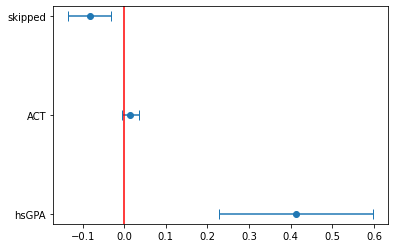

In [20]:
coef = res_gpa.params      # 推定値
varname = coef.index       # 変数名
ci = res_gpa.conf_int()    # 信頼区間を　ci　に入れる
error = ci.iloc[:,1]-coef  # 信頼区間の幅の半分

plt.errorbar(x=coef[1:], y=varname[1:], xerr=error[1:], fmt='o',capsize=5)  # 切片以外のエラーバー
plt.axvline(0, color='red')  # 垂直線
pass

`ACT`の信頼区間に`0`が含まれることが分かる。

## $F$検定

### 説明

回帰分析において複数のOLS推定量に何らかの制約が妥当かどうかを調べる際に使うのが$F$検定である。例えば，次の回帰式の場合

$$
y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+u
$$

制約式の例として以下が挙げられる。

$\beta_1=\beta_2=\beta_3=0$

$\beta_2=\beta_3=0$

$\beta_2=2\beta_3$

---
帰無仮説と対立仮説は次のようになる。
* 帰無仮説：$\text{H}_0$：制約が成立する
* 対立仮説：$\text{H}_A$：制約は成立しない

検定手順
1. 制約がない回帰式を推定する。
2. 制約がある回帰式を推定する。
3. 次の式に従い$F$値を計算する

    $$
    F=\frac{\left(SSR_1-SSR_0\right)/q}{SSR_0/(n-k-1)}
    =\frac{\left(R_0^2-R_1^2\right)/q}{\left(1-R_0^2\right)/(n-k-1)}
    \sim F_{n-k-1}^q
    $$
    
    左辺の$F$は$F$値、右辺の$F_{n-k-1}^q$は自由度が$q$と$n-k-1$の$F$分布。

4. 有意水準に基づく棄却臨界値と比べる（もしくは$p$値を有意水準と比べる）

上の式で
* $0$：制約がない変数の添え字
* $1$：制約がある変数の添え字
* $SSR$：残差変動の平方和（Residual Sum of Squares）
* $R^2$：決定係数
* $n$：標本の大きさ
* $k$：定数項以外の説明変数（制約がない回帰式）
* $q$：制約式の数

名称：
* $q$を「分子の自由度」と呼ぶ
* $n-k-1$を「分母の自由度」と呼ぶ

---
**＜棄却ルール＞**

$F>F_c(a)$　$\Rightarrow$　$\text{H}_0$を棄却

* $F_c(a)$：棄却臨界値
* $a$：有意水準

（注意）$F$値は必ず正の値をとる。従って，$t$検定の「右片側検定」のパターンしか存在しない。

**＜$p$値を使う場合の手順＞**

* 棄却するための有意水準 $a$を決める（例えば，0.05）
* $p値<a$の場合，$\text{H}_0$を棄却

### 回帰分析

例として米国野球選手（メジャーリーグ）に関するデータ`mlb1`を使う。

In [21]:
mlb1 = wooldridge.data('mlb1')
wooldridge.data('mlb1',description=True)

name of dataset: mlb1
no of variables: 47
no of observations: 353

+----------+----------------------------+
| variable | label                      |
+----------+----------------------------+
| salary   | 1993 season salary         |
| teamsal  | team payroll               |
| nl       | =1 if national league      |
| years    | years in major leagues     |
| games    | career games played        |
| atbats   | career at bats             |
| runs     | career runs scored         |
| hits     | career hits                |
| doubles  | career doubles             |
| triples  | career triples             |
| hruns    | career home runs           |
| rbis     | career runs batted in      |
| bavg     | career batting average     |
| bb       | career walks               |
| so       | career strike outs         |
| sbases   | career stolen bases        |
| fldperc  | career fielding perc       |
| frstbase | = 1 if first base          |
| scndbase | =1 if second base          |
| shrtsto

このデータセットを使い，年俸（`salary`）が次の変数とどう関係するかを考える。
* `years`：メジャーリーグでプレイした期間（年）
* `gamesyr`：年間出場回数
* `bavg`：通算打率
* `hrunsyr`：１シーズンあたりホームラン数
* `rbinsyr`：１シーズンあたり打点

まず制約がない回帰分析をおこなう。

In [22]:
formula_0 = 'np.log(salary) ~ years + gamesyr + bavg + hrunsyr + rbisyr'
res_0 = ols(formula_0, data=mlb1).fit()

#### 例１

**＜制約＞**
`bavg`, `hrunsyr`, `rbisyr`は`salary`に影響を与えない。

$H_0:\;\beta_{\text{bavg}}=\beta_{\text{hrunsyr}}=\beta_{\text{rbisyr}}=0$

$H_A:\;H_0は成立しない$

制約がある場合の回帰分析

In [23]:
formula_1 = 'np.log(salary) ~ years + gamesyr'
res_1 = ols(formula_1, data=mlb1).fit()

##### 手計算

$F$値の計算

In [24]:
# 決定係数
r2_0 = res_0.rsquared
r2_1 = res_1.rsquared

n = res_0.nobs  # 標本の大きさ
k = res_0.df_model  # 定数項以外の説明変数の数
q = 3  # 制約式の数

# F値:
F = (r2_0 - r2_1) / (1 - r2_0) * (n - k - 1) / q
F

9.550253521951914

$a=0.05$の場合の棄却臨界値

In [25]:
a = 0.05
f.ppf(1-a, dfn=q, dfd=n-k-1)   # f.ppfについてはscipy.statsを参照

2.6306414891156504

従って$H_0$を棄却する。

$p$値

In [26]:
1-f.cdf(F, dfn=q, dfd=n-k-1)

4.473708139829391e-06

##### メソッドを使う

制約式の定義

In [27]:
hypotheses = 'bavg = 0, hrunsyr = 0, rbisyr = 0'

`res_0`のメソッド`f_test`を使い、引数に上のセルで定義した制約式`hypotheses`を使う。

In [28]:
res_f_test = res_0.f_test(hypotheses)

`res_f_test`に`F`検定の結果を割り当てたが、そのメソッド`summary()`を使い結果を表示する。

In [29]:
res_f_test.summary()

'<F test: F=array([[9.55025352]]), p=4.473708139839406e-06, df_denom=347, df_num=3>'

上の結果にある記号の意味：
* `F`：$F$値
* `p`：$p$値
* `df_denom`：分母の自由度
* `df_num`：分子の自由度

手計算と同じ結果である。

#### 例２

**＜制約＞**
定数項以外の全ての説明変数は`salary`に影響を与えない。

$H_0:\;\beta_{\text{years}}=\beta_{\text{gamesyr}}=\beta_{\text{bavg}}=\beta_{\text{hrunsyr}}=\beta_{\text{rbisyr}}=0$

$H_A:\;H_0は成立しない$

この場合，`res_0`の`fvalue`から$F$値，`f_pvalue`から$p$値を属性として取得できる。

In [30]:
res_0.fvalue

117.06032008521446

In [31]:
res_0.f_pvalue

2.938042293220727e-72

$p$値は非常に小さな値となっており、0.1%の有意水準でも帰無仮説を棄却できる。

例２の結果はOLS推定結果のメソッド`summary()`で表示される表の中にある`F-statistic`と`Prob(F-statistic)`で確認することもできる。

In [32]:
print(res_0.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     117.1
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           2.94e-72
Time:                        20:04:07   Log-Likelihood:                -385.11
No. Observations:                 353   AIC:                             782.2
Df Residuals:                     347   BIC:                             805.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1924      0.289     38.752      0.0